In [1]:
#import the usual modules
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
from os.path import join
os.chdir("/Users/a100664/Documents/SolarAtmosphere/MCEq")
import matplotlib.pyplot as plt
import numpy as np
import pylab
plt.rc("savefig", dpi=200)

from MCEq.core import MCEqRun
import CRFluxModels as pm
from mceq_config import config, mceq_config_without

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
os.getcwd()

'/Users/a100664/Documents/SolarAtmosphere/MCEq'

In [3]:
import MCEq.density_profiles as den_p
import MCEq.geometry as geom

In [4]:
import sys
sys.path

['',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python27.zip',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/plat-darwin',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/plat-mac',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/plat-mac/lib-scriptpackages',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/lib-tk',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/lib-old',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/lib-dynload',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/site-packages/setuptools-18.3.2-py2.7.egg',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/site-packages',
 '/Users/a100664/Software/anaconda/envs/mceq_env/lib/python2.7/site-packages/IPython/extensions',
 '/Users/a100664/.ipython',
 '/Users/a100664/Documents/SolarAtmosphere/MCEq',
 '/Users/a100664/Documents/SolarAt

In [5]:
Atmosph=np.loadtxt("/Users/a100664/Documents/SolarAtmosphere/SolarAtmosphere.csv",usecols=[1,2,3],delimiter=',')
kmtocm=1000*100
FromSource=(Atmosph[0,0]-Atmosph[:,0])*kmtocm
Densities=Atmosph[:,2]


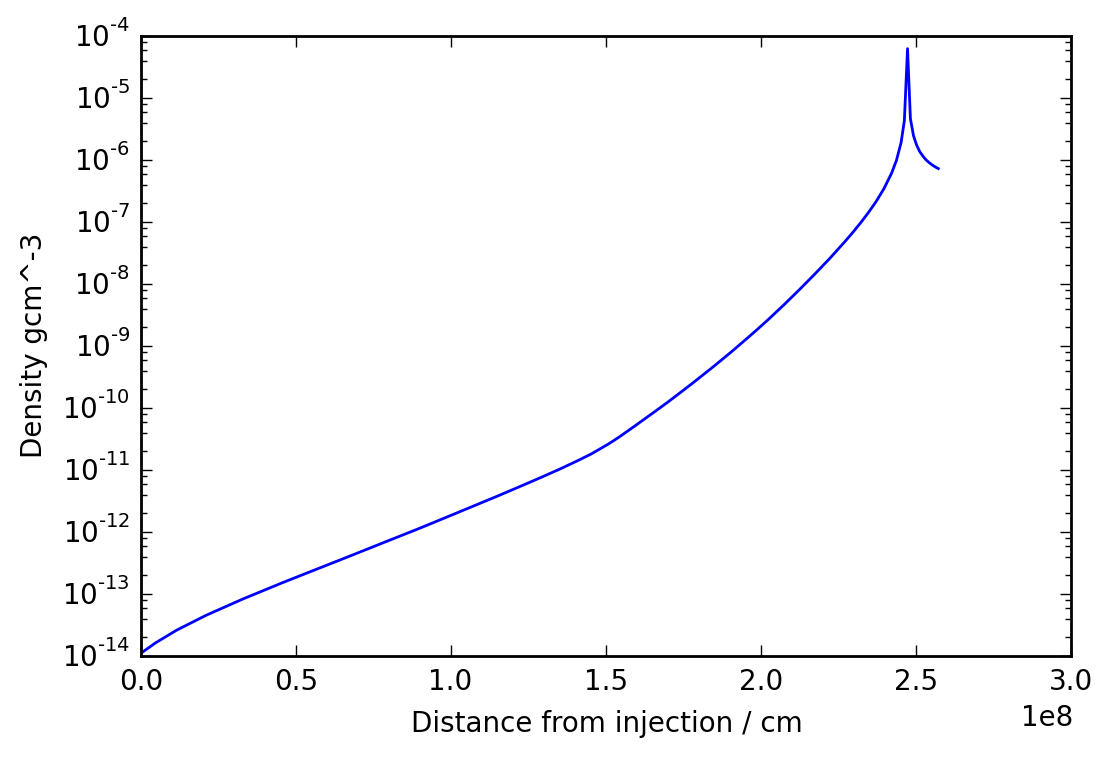

In [6]:
pylab.plot(FromSource,Densities)
pylab.semilogy()
pylab.xlabel("Distance from injection / cm")
pylab.ylabel("Density gcm^-3")
pylab.show()

In [7]:
os.getcwd()

'/Users/a100664/Documents/SolarAtmosphere/MCEq'

In [8]:
ad = den_p.GeneralizedTarget()
ad.len_target=FromSource[-1]
for i in range(0,len(FromSource)):
#    print FromSource[i],Densities[i-1]
    ad.add_material(FromSource[i],Densities[i],'Solar Layer'+str(i))


In [9]:
print "Target length", ad.len_target

Target length 257200000.0


********************* List of materials *************************
-----------------------------------------------------------------
no  | name            | start [m] | end [m]   | density [g/cm**3]
-----------------------------------------------------------------
 0  | air             |   0.000   |   0.000   | 0.00122 
 1  | Solar Layer0    |   0.000   | 47000.000 | 0.00000 
 2  | Solar Layer1    | 47000.000 | 115000.000 | 0.00000 
 3  | Solar Layer2    | 115000.000 | 209000.000 | 0.00000 
 4  | Solar Layer3    | 209000.000 | 330000.000 | 0.00000 
 5  | Solar Layer4    | 330000.000 | 459000.000 | 0.00000 
 6  | Solar Layer5    | 459000.000 | 561000.000 | 0.00000 
 7  | Solar Layer6    | 561000.000 | 671000.000 | 0.00000 
 8  | Solar Layer7    | 671000.000 | 785000.000 | 0.00000 
 9  | Solar Layer8    | 785000.000 | 901000.000 | 0.00000 
10  | Solar Layer9    | 901000.000 | 1025000.000 | 0.00000 
11  | Solar Layer10   | 1025000.000 | 1153000.000 | 0.00000 
12  | Solar Layer11   | 115300

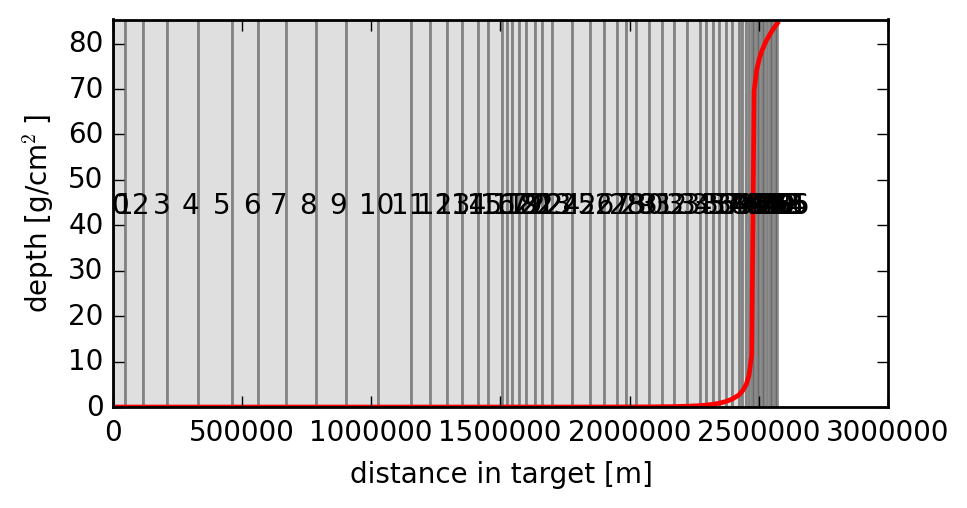

In [10]:
ad.draw_materials()


In [11]:
mceq_run = MCEqRun(

interaction_model='SIBYLL2.3_rc1',

primary_model=(pm.HillasGaisser2012, "H3a"),
#Do not provide any default values to avoid unnecessary initilizations
theta_deg=0.,
density_model=('GeneralizedTarget', None),
# Expand the rest of parameters
**mceq_config_without(['density_model','integrator'])
)

#config['integrator'] = 'odepack'


Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta-", "D*0", 
"D*0-bar", "XiC*0-bar", "XiC*+-bar", "XiC*+", "XiC*0", "Ds*+", "Ds*

In [12]:
dm = mceq_run.density_model
dm.set_length(FromSource[-1])
pos_grid = np.arange(0,ad.len_target,ad.len_target/100.,dtype='float64')
x_grid = dm.s_h2X(pos_grid)



In [13]:
mceq_run.solve(int_grid=x_grid)



MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 107701 integration steps.

MCEqRun::_forward_euler(): time elapsed during integration: 1351.07740712 sec


In [14]:
mag=3

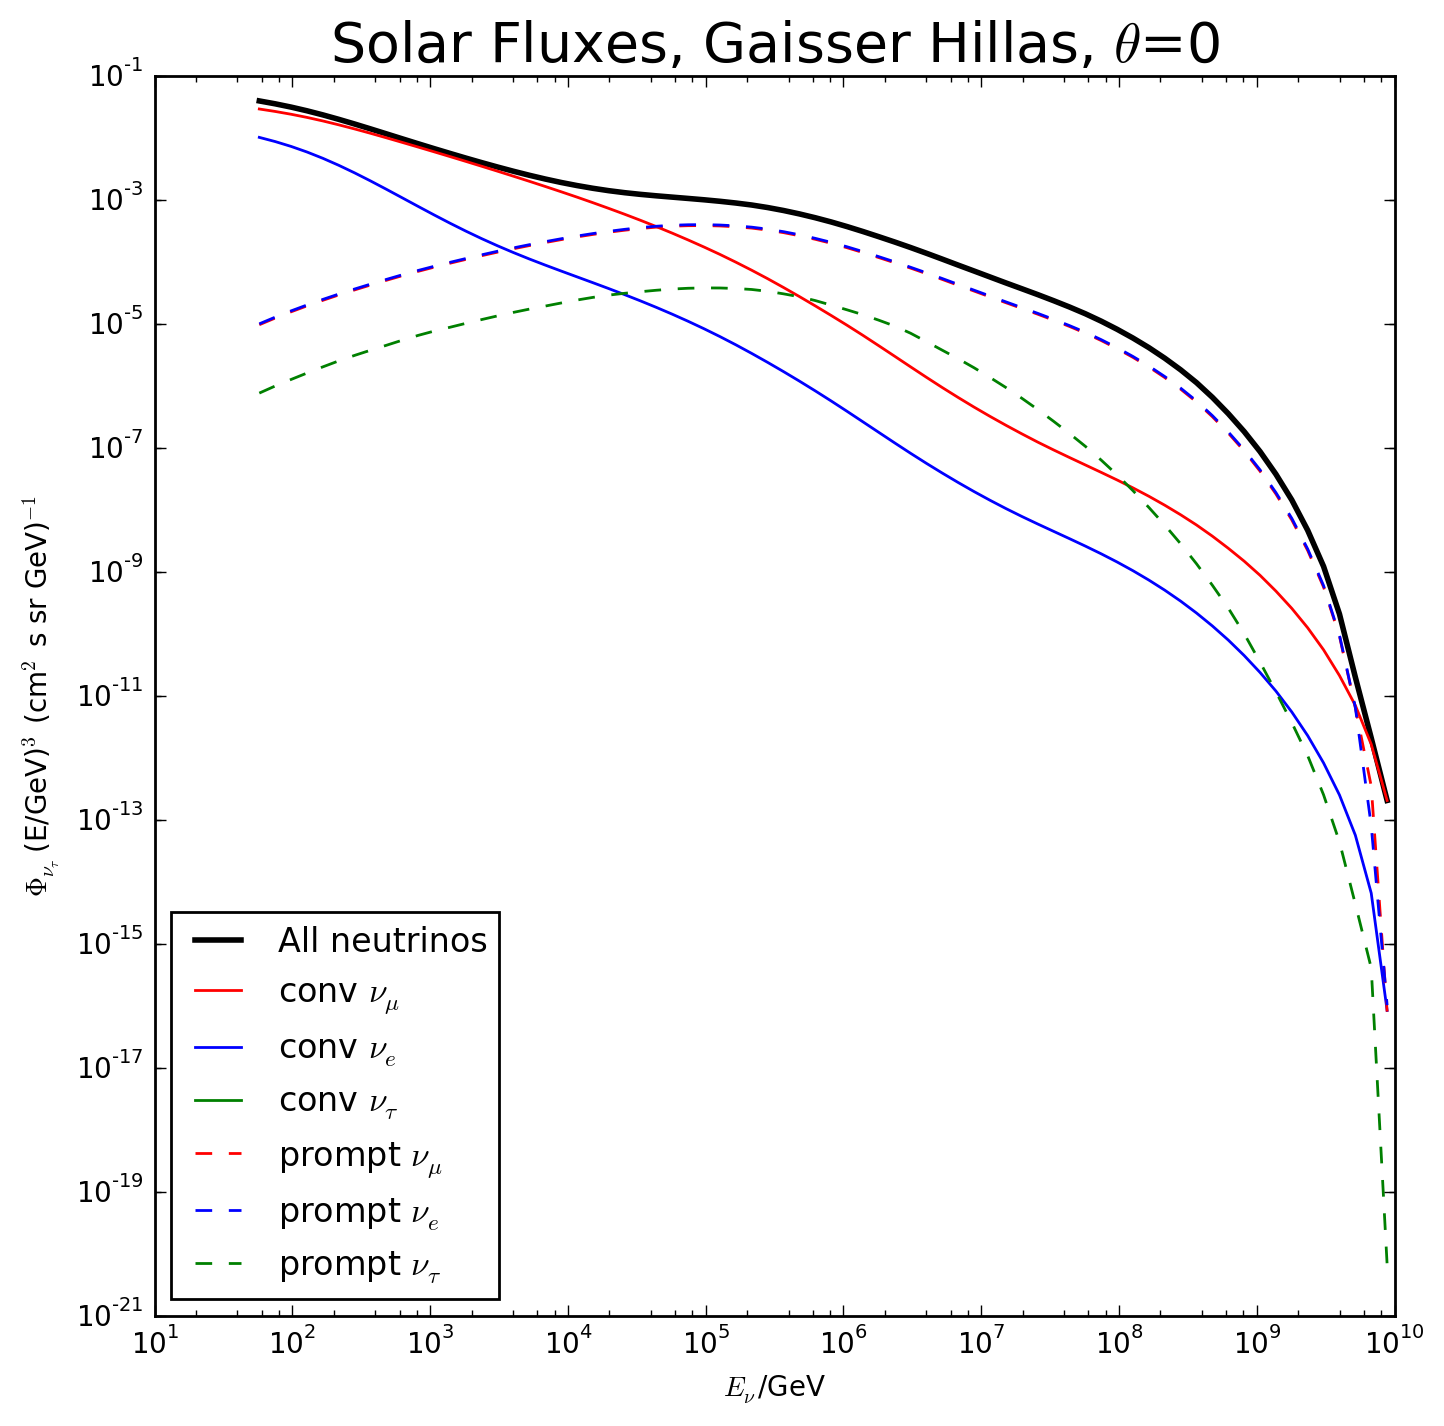

In [15]:
plt.figure(figsize=[8,8])
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('total_nutau',mag=mag)+
                            mceq_run.get_solution('total_antinutau',mag=mag)+
                            mceq_run.get_solution('total_numu',mag=mag)+
                            mceq_run.get_solution('total_antinumu',mag=mag)+
                            mceq_run.get_solution('total_nue',mag=mag)+
                            mceq_run.get_solution('total_antinue',mag=mag),label='All neutrinos', color='black', linewidth=2)

plt.loglog(mceq_run.e_grid, mceq_run.get_solution('conv_numu',mag=mag) +
                            mceq_run.get_solution('conv_antinumu',mag=mag),label=r'conv $\nu_\mu$',color='red')
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('conv_nue',mag=mag) +
                            mceq_run.get_solution('conv_antinue',mag=mag),label=r'conv $\nu_e$',color='blue')
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('conv_nutau',mag=mag) +
                            mceq_run.get_solution('conv_antinutau',mag=mag),label=r'conv $\nu_\tau$',color='green')
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('pr_numu',mag=mag) +
                            mceq_run.get_solution('pr_antinumu',mag=mag),'--',label=r'prompt $\nu_\mu$',color='red')
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('pr_nue',mag=mag) +
                            mceq_run.get_solution('pr_antinue',mag=mag),'--',label=r'prompt $\nu_e$',color='blue')
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('pr_nutau',mag=mag) +
                            mceq_run.get_solution('pr_antinutau',mag=mag),'--',label=r'prompt $\nu_\tau$',color='green')


#pylab.ylim(1e-6,1e3)
#pylab.xlim(0,1e4)
pylab.xlabel(r"$E_\nu$/GeV")
plt.ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")

plt.legend(loc='lower left')
plt.title(r"Solar Fluxes, Gaisser Hillas, $\theta$=0",fontsize=20)
plt.show()

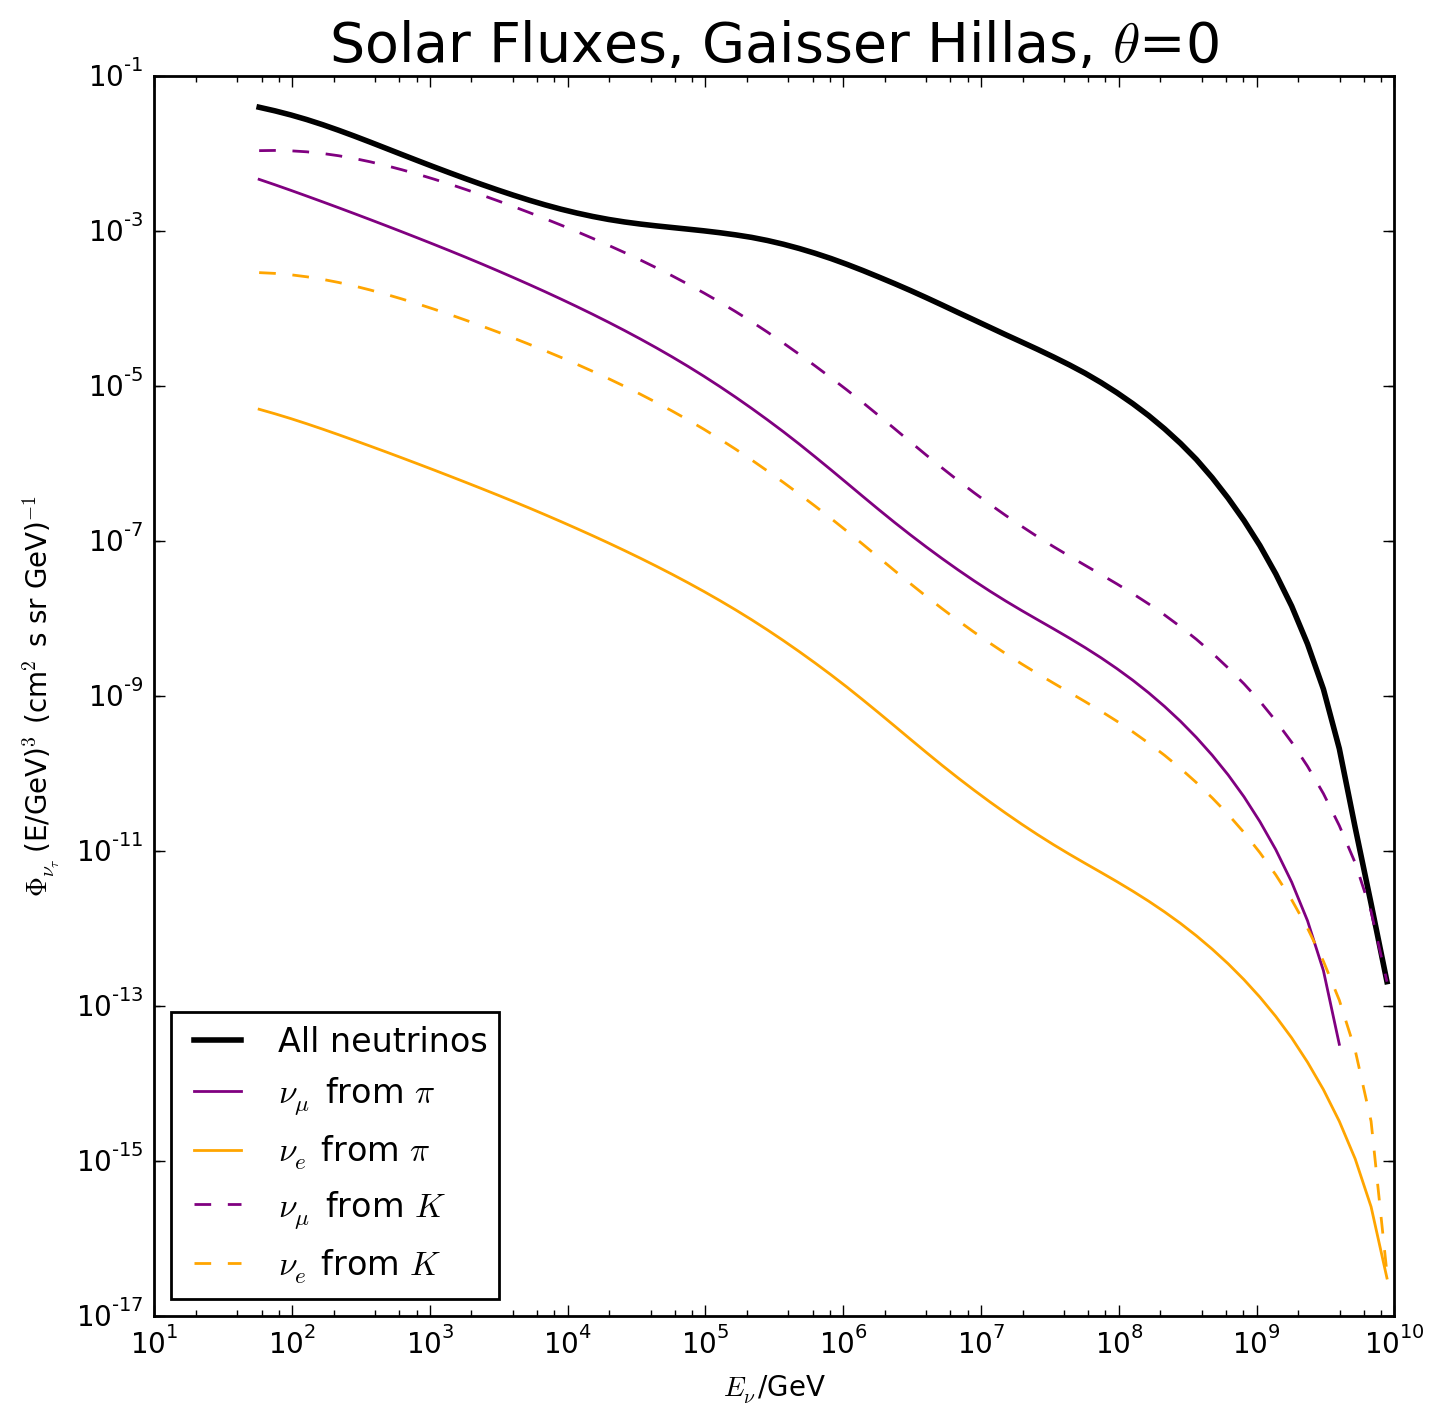

In [16]:
plt.figure(figsize=[8,8])

plt.title(r"Solar Fluxes, Gaisser Hillas, $\theta$=0",fontsize=20)

plt.loglog(mceq_run.e_grid, mceq_run.get_solution('total_nutau',mag=mag)+
                            mceq_run.get_solution('total_antinutau',mag=mag)+
                            mceq_run.get_solution('total_numu',mag=mag)+
                            mceq_run.get_solution('total_antinumu',mag=mag)+
                            mceq_run.get_solution('total_nue',mag=mag)+
                            mceq_run.get_solution('total_antinue',mag=mag),label='All neutrinos', color='black', linewidth=2)


plt.loglog(mceq_run.e_grid, mceq_run.get_solution('pi_numu',mag=mag) +
                            mceq_run.get_solution('pi_antinumu',mag=mag),label=r'$\nu_\mu$ from $\pi$',color='purple')
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('pi_nue',mag=mag) +
                            mceq_run.get_solution('pi_antinue',mag=mag),label=r'$\nu_e$ from $\pi$',color='orange')
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('k_numu',mag=mag) +
                            mceq_run.get_solution('k_antinumu',mag=mag),'--',label=r'$\nu_\mu$ from $K$',color='purple')
plt.loglog(mceq_run.e_grid, mceq_run.get_solution('k_nue',mag=mag) +
                            mceq_run.get_solution('k_antinue',mag=mag),'--',label=r'$\nu_e$ from $K$',color='orange')
#pylab.ylim(1e-6,1e3)
#pylab.xlim(0,1e4)
pylab.xlabel(r"$E_\nu$/GeV")
plt.ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")

plt.legend(loc='lower left')
plt.show()